<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#SQL,-PostgreSQL-và-BigQuery" data-toc-modified-id="SQL,-PostgreSQL-và-BigQuery-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>SQL, PostgreSQL và BigQuery</a></span><ul class="toc-item"><li><span><a href="#Tại-sao-phải-học-SQL?" data-toc-modified-id="Tại-sao-phải-học-SQL?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Tại sao phải học SQL?</a></span></li><li><span><a href="#Big-Data" data-toc-modified-id="Big-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Big Data</a></span></li><li><span><a href="#Google-BigQuery" data-toc-modified-id="Google-BigQuery-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Google BigQuery</a></span><ul class="toc-item"><li><span><a href="#Truy-xuất-và-hình-dung-dữ-liệu-BigQuery-một-cách-trực-quan" data-toc-modified-id="Truy-xuất-và-hình-dung-dữ-liệu-BigQuery-một-cách-trực-quan-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Truy xuất và hình dung dữ liệu BigQuery một cách trực quan</a></span></li><li><span><a href="#Cách-thứ-2:-Dùng-Pandas-DataFrames" data-toc-modified-id="Cách-thứ-2:-Dùng-Pandas-DataFrames-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Cách thứ 2: Dùng Pandas DataFrames</a></span></li><li><span><a href="#Bài-tập-thực-hành" data-toc-modified-id="Bài-tập-thực-hành-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Bài tập thực hành</a></span></li></ul></li><li><span><a href="#SQL-Query" data-toc-modified-id="SQL-Query-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>SQL Query</a></span></li><li><span><a href="#Làm-việc-với-các-tập-dữ-liệu-lớn" data-toc-modified-id="Làm-việc-với-các-tập-dữ-liệu-lớn-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Làm việc với các tập dữ liệu lớn</a></span></li><li><span><a href="#GROUP-BY,-HAVING-và-COUNT()" data-toc-modified-id="GROUP-BY,-HAVING-và-COUNT()-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>GROUP BY, HAVING và COUNT()</a></span><ul class="toc-item"><li><span><a href="#COUNT()" data-toc-modified-id="COUNT()-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>COUNT()</a></span></li><li><span><a href="#GROUP-BY" data-toc-modified-id="GROUP-BY-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>GROUP BY</a></span></li><li><span><a href="#GROUP-BY-...-HAVING" data-toc-modified-id="GROUP-BY-...-HAVING-1.6.3"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>GROUP BY ... HAVING</a></span></li><li><span><a href="#Bài-tập-thực-hành" data-toc-modified-id="Bài-tập-thực-hành-1.6.4"><span class="toc-item-num">1.6.4&nbsp;&nbsp;</span>Bài tập thực hành</a></span></li></ul></li></ul></li></ul></div>

# SQL, PostgreSQL và BigQuery

## Tại sao phải học SQL?
Mặc dù cơ sở dữ liệu bị nhiều người xem là một chủ đề chán ngắt trong khoa học dữ liệu, đây lại là một kỹ năng cần thiết khi bạn tiến vào lĩnh vực này. Số liệu cho thấy: SQL là kỹ năng được yêu cầu cần thiết phổ biến nhất trong các công việc liên quan đến khoa học dữ liệu.

Pandas có thể thực hiện hầu hết các lệnh SQL phổ biến nhưng lại không phù hợp với cơ sở dữ liệu lớn - giới hạn chính là lượng dữ liệu có thể chứa trong bộ nhớ. Do đó, nếu ta phải làm việc với các cơ sở dữ liệu lớn, SQL được sử dụng để chuyển đổi dữ liệu thành gói nhỏ trước khi pandas tải nó vào bộ nhớ.

Hơn nữa, SQL không chỉ là một phương thức để lưu các tệp văn bản nguyên gốc vào một bảng. Sức mạnh của SQL đến từ việc cho phép ta có một tập hợp các bảng có "quan hệ" với nhau, thường được thể hiện trong **Biểu đồ quan hệ** (ERD).
![ERD](https://miro.medium.com/max/750/1*RszpPZ7OYYWHmf0I35U2fg.jpeg)

Đa số mọi người sử dụng đồng thời cả hai - sử dụng các truy vấn SQL để ghép , cắt và tải dữ liệu vào bộ nhớ; sau đó họ thực hiện phần lớn phân tích dữ liệu trong Python bằng các hàm thư viện trong pandas.

Việc này đặc biệt quan trọng khi xử lý các bộ dữ liệu lớn với hàng chục TB dữ liệu với vài tỷ hàng. Các chuyên giá thường bắt đầu với các truy vấn SQL trích xuất 1% dữ liệu cần thiết vào 1 tệp csv, trước khi chuyển sang Python Pandas để phân tích dữ liệu.

In [ ]:
select dc.service_id,
	v.name as `Nhà xe`,
	m.name as `Chủ Hàng`,
	CONVERT_TZ(from_unixtime(sg.created_at), @@session.time_zone, '+07:00') as `Thoi gian action`, 
	CONVERT_TZ(sg.extra_data->>'$.doc_date', @@session.time_zone, '+07:00') as `Thoi gian nhận`,
	sg.extra_data->>'$.paper_weight' as `Phiếu cân`,
	sg.extra_data->>'$.paper_e' as `Phiếu E`,
	sg.extra_data->>'$.paper_f' as `Phiếu F`,
	sg.extra_data->>'$.paper_delivery' as `paper_delivery`,
	sg.extra_data->>'$.paper_warehousing' as `paper_warehousing`
from repo_doc.repodoc_documentchecklist as dc
inner join repo_core.core_service as s on s.id=dc.service_id
inner join repo_core.core_servicegrading as sg on sg.service_id = dc.service_id
inner join repo_core.core_vendor as v on v.id=s.vendor_id
inner join repo_core.core_order as o on o.id = s.order_id
inner join repo_core.core_plan as p on p.id=o.plan_id
inner join repo_core.core_merchant as m on m.id=p.merchant_id
where dc.`hard_copy_status`='hc_verifying' and 
		dc.entity_type_id='3' and dc.last_time_hard_copy_full is NULL and 
		s.status='completed' and 
		sg.grading_type_id='5' and 
		sg.extra_data is not null and 
		sg.extra_data->>'$.paper_weight' = 0 and
		sg.extra_data->>'$.paper_e' = 0 and 
		sg.extra_data->>'$.paper_f' = 0 and 
		sg.extra_data->>'$.paper_delivery' = 0 and
		sg.extra_data->>'$.paper_warehousing' = 0 and
		from_unixtime(sg.created_at) >= '2019-09-11'
ORDER BY dc.service_id desc

Trên đây là một ví dụ thực tế dùng sql để truy xuất dữ liệu từ nhiều micro-service khác nhau (mỗi micro-service có một database riêng). Đây là ngôn ngữ mà team product khi làm việc cùng team dev thường xuyên dùng để trao đổi với nhau trong quá trình test và phát triển sản phẩm .

## Big Data
Khi ta không thể chỉ làm việc với 1 máy tính mà phải truy cập dữ liệu được chứa trong nhiều máy chủ phân tán ở khắp nơi. Peter Norwig - Director at Google có nhắc đến Numbers Everyone Should Know
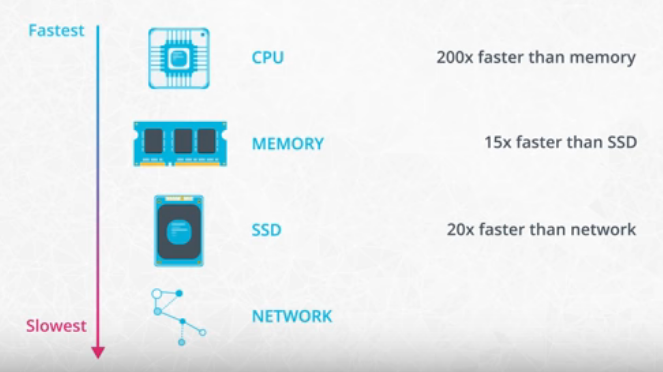

Bottle neck chính là ở Network. File size < 4Gb vẫn có thể xử lý với bộ nhớ của 1 máy tính. Cùng chương trình nếu chạy cho file 200GB thì không thể.

Ta thử chơi với 1 công cụ là BigQuery. Lưu ý là có nhiều công cụ khác ngoài kia như Google Cloud Bigtable, Amazon Redshift, Hadoop, Snowflake,...

## Google BigQuery
Chúng ta sẽ thử chơi với dữ liệu lớn thật sự. BigQuery là kho dữ liệu quy mô petabyte (~ 1 triệu GB. Hơn 10 tỷ bức ảnh tồn tại trên Facebook có dung lượng 1,5 petabyte và một máy quay video HD phải chạy 24/7 trong 3 năm rưỡi mới có thể lấp đầy ổ cứng 1PB.) mà bạn có thể sử dụng để chạy các truy vấn SQL trên một lượng lớn dữ liệu trong thời gian gần như thời gian thực. Trong hướng dẫn này ta sẽ truy cập vào [BigQuery public dataset](https://cloud.google.com/bigquery/public-data/) được Google lưu trữ miễn phí.

* Bước đầu tiên, cài đặt trong virtual env
`pip install --upgrade google-cloud-bigquery`
* Tạo file xác thực (authentication) theo hướng dẫn trong https://cloud.google.com/docs/authentication/getting-started?authuser=1

**Lưu ý: đặt đường dẫn đến file credential bằng 1 trong 2 cách** 
1. `export GOOGLE_APPLICATION_CREDENTIALS=[FILE_PATH]` đường dẫn phải tương đối so với root của virtual environment
2. hoặc có thể đặt luôn trong notebook
```
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="[FILE_NAME].json"
```

### Truy xuất và hình dung dữ liệu BigQuery một cách trực quan

In [1]:
%load_ext google.cloud.bigquery

Thư viện BigQuery client cung cấp lệnh cell magic, `%%bigquery`, cho phép chạy một câu lệnh SQL và trả về kết quả là một Pandas DataFrame. Câu lệnh sau trả về tổng số lượng trẻ em là nam sinh theo năm từ bảng mẫu `natality`*(Bảng natality có kích cỡ 21.94 GB và 137,826,763 dòng dữ liệu)*

In [2]:
%%bigquery
SELECT
    source_year AS year,
    COUNT(is_male) AS birth_count
FROM `bigquery-public-data.samples.natality`
GROUP BY year
ORDER BY year DESC
LIMIT 15

,year,birth_count
0,2008,4255156
1,2007,4324008
2,2006,4273225
3,2005,4145619
4,2004,4118907
5,2003,4096092
6,2002,4027376
7,2001,4031531
8,2000,4063823
9,1999,3963465


Chạy lại câu lệnh trên nhưng lần này ta lưu kết quả vào biến `total_births` (là một đối số của `%%bigquery`. Ta sẽ dùng biến này để vẽ đồ thị.

In [2]:
%%bigquery total_births
SELECT
    source_year AS year,
    COUNT(is_male) AS birth_count
FROM `bigquery-public-data.samples.natality`
GROUP BY year
ORDER BY year DESC
LIMIT 15

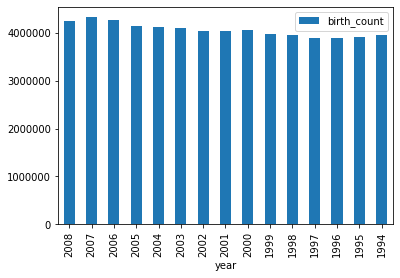

In [3]:
# Thử vẽ đồ thị dạng plot cho biến này
%matplotlib inline
total_births.plot

Tiếp theo, ta thử lấy 1 bảng đếm số lượng trẻ em sinh ra theo ngày trong tuần

In [4]:
%%bigquery births_by_weekday
SELECT
    wday,
    SUM(CASE WHEN is_male THEN 1 ELSE 0 END) AS male_births,
    SUM(CASE WHEN is_male THEN 0 ELSE 1 END) AS female_births
FROM `bigquery-public-data.samples.natality`
WHERE wday IS NOT NULL
GROUP BY wday
ORDER BY wday ASC

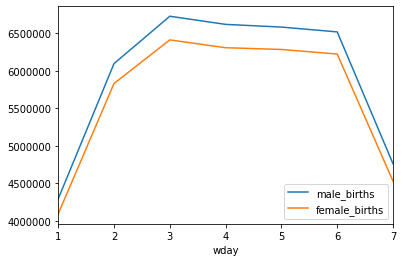

In [5]:
births_by_weekday.plot(x='wday');

### Cách thứ 2: Dùng Pandas DataFrames
Câu lệnh ma thuật cho phép bạn sử dụng cú pháp tối thiểu để tương tác với BigQuery. Ẩn phía sau, `%%bigquery` sử dụng thư viện máy khách BigQuery Python để chạy truy vấn SQL, chuyển đổi kết quả thành Pandas Dataframe, cho phép lưu kết quả vào một biến và cuối cùng hiển thị kết quả. Sử dụng thư viện máy khách BigQuery Python thay vì câu lệnh ma thuật cho phép bạn kiểm soát nhiều truy vấn hơn và cho phép các cấu hình phức tạp hơn. Sự tích hợp của thư viện với Pandas cho phép bạn kết hợp sức mạnh của khai báo SQL với code Python để thực hiện các nhiệm vụ phân tích dữ liệu, trực quan hóa và chuyển đổi thú vị.

In [7]:
from google.cloud import bigquery
client = bigquery.Client()

Đầu tiên ta cần tạo đối tượng `Client`. Đây là đối tượng trung tâm trong việc lấy dữ liệu từ BigQuery datasets. Bây giờ ta sẽ làm việc với các bài viết trên trang [Hacker News](https://news.ycombinator.com/). Mỗi dataset tương ứng với một project, các bước sau giúp truy cập dataset.

In [15]:
# Tạo một liên kết tới "hacker_news" dataset
dataset_ref = client.dataset("hacker_news", project="bigquery-public-data")

# lấy dữ liệu vào dataset. Mỗi dataset là một tập hợp các bảng.
hacker_news_dataset = client.get_dataset(dataset_ref)

Mỗi dataset là một tập hợp các bảng, có thể nghĩ một dataset là một file spreadsheet chứa nhiều bảng.Ta dùng `list_tables()` để liệt kê các bảng trong dataset.

In [16]:
# Liệt kê tất cả các bảng trong "hacker_news" dataset
tables = list(client.list_tables(hacker_news_dataset))

# In tên bảng
print([table.table_id for table in tables])

['comments', 'full', 'full_201510', 'stories']


Mô hình dữ liệu của BigQuery
![mô hình](https://i.imgur.com/biYqbUB.png)

Tương tự như với dataset, ta lấy dữ liệu từ bảng "full" như sau. Và sẽ có được **schema** hay là cấu trúc của bảng. Ta sẽ cần hiểu rõ cấu trúc của bảng để lấy dữ liệu mà ta muốn ra.

In [17]:
# Tạo con trỏ đến bảng "full"
table_ref = dataset_ref.table("comments")

# Lấy dữ liệu từ bảng
table = client.get_table(table_ref)
table.schema

[SchemaField('id', 'INTEGER', 'NULLABLE', 'Unique comment ID', ()),
 SchemaField('by', 'STRING', 'NULLABLE', 'Username of commenter', ()),
 SchemaField('author', 'STRING', 'NULLABLE', 'Username of author', ()),
 SchemaField('time', 'INTEGER', 'NULLABLE', 'Unix time', ()),
 SchemaField('time_ts', 'TIMESTAMP', 'NULLABLE', 'Human readable time in UTC (format: YYYY-MM-DD hh:mm:ss)', ()),
 SchemaField('text', 'STRING', 'NULLABLE', 'Comment text', ()),
 SchemaField('parent', 'INTEGER', 'NULLABLE', 'Parent comment ID', ()),
 SchemaField('deleted', 'BOOLEAN', 'NULLABLE', 'Is deleted?', ()),
 SchemaField('dead', 'BOOLEAN', 'NULLABLE', 'Is dead?', ()),
 SchemaField('ranking', 'INTEGER', 'NULLABLE', 'Comment ranking', ())]

Giờ ta có thể dùng `list_rows()` để kiểm tra dữ liệu thật (xem có giống với mô tả không). Hàm này trả về một đối tượng BigQuery `RowIterator` và có thể được chuyển thành một DataFrame với hàm `to_dataframe()`

In [18]:
client.list_rows(table, max_results=5).to_dataframe()

,id,by,author,time,time_ts,text,parent,deleted,dead,ranking
0,2701393,5l,5l,1309184881,2011-06-27 14:28:01+00:00,And the glazier who fixed all the broken windo...,2701243,None,None,0
1,5811403,99,99,1370234048,2013-06-03 04:34:08+00:00,Does canada have the equivalent of H1B/Green c...,5804452,None,None,0
2,21623,AF,AF,1178992400,2007-05-12 17:53:20+00:00,"Speaking of Rails, there are other options in ...",21611,None,None,0
3,10159727,EA,EA,1441206574,2015-09-02 15:09:34+00:00,Humans and large livestock (and maybe even pet...,10159396,None,None,0
4,2988424,Iv,Iv,1315853580,2011-09-12 18:53:00+00:00,I must say I reacted in the same way when I re...,2988179,None,None,0


In [21]:
# Xem 5 dòng đầu tiên của cột 'text' trong bảng 'comments'
client.list_rows(table, selected_fields=table.schema[5:6], max_results=5).to_dataframe()

,text
0,And the glazier who fixed all the broken windo...
1,Does canada have the equivalent of H1B/Green c...
2,"Speaking of Rails, there are other options in ..."
3,Humans and large livestock (and maybe even pet...
4,I must say I reacted in the same way when I re...


### Bài tập thực hành
1. Chúng ta sẽ dùng dataset `openaq`. Tìm cách đếm số bảng trong dataset này.

In [ ]:
# Khai báo biến ds lấy dữ liệu từ "openaq" dataset rồi tìm số bảng
ds_ref = client.dataset("openaq", project="bigquery-public-data")
openaq_dataset = 

2. Liệt kê 5 dòng đầu tiên trong bảng `global_air_quality`

## SQL Query
Các keywords là **SELECT**, **FROM** và **WHERE** cho phép truy cập dữ liệu từ những cột cụ thể thỏa điều kiện cho phép. Query sau liệt kê tất cả các thành phố mà cột `country` có giá trị là `US`

In [9]:
query = """
        SELECT city
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """

Setup với hàm `query()` và chạy, chuyển kết quả thành DataFrame. 3 dấu ngoặc kép `"""` giúp Python hiểu là mọi thứ phía trong là 1 chuỗi duy nhất, kể cả là có xuống dòng (giúp dễ đọc Query hơn).
* Lưu ý: tên bảng sau keyword **FROM** nằm trong dấu backtick `` ` ``
* Không cần phải viết hoa SELECT và FROM nhưng theo quy cách này sẽ giúp query của bạn dễ đọc hơn

In [10]:
query_job = client.query(query)
us_cities = query_job.to_dataframe()
us_cities.city.value_counts().head()

Phoenix-Mesa-Scottsdale                     87
Houston                                     80
Los Angeles-Long Beach-Santa Ana            61
Riverside-San Bernardino-Ontario            58
New York-Northern New Jersey-Long Island    56
Name: city, dtype: int64

## Làm việc với các tập dữ liệu lớn
**LƯU Ý: BigQuery query pricing provides the first 1 TB per month free of charge. Với dữ liệu lớn, bạn vẫn nên cẩn thận vì chỉ vài queries có thể dùng hết dung lượng này ngay. Nhưng cũng đừng lo quá: chúng ta sẽ học cách tránh scan quá nhiều dữ liệu một lúc để không bị vượt định mức này**

Dataset Hacker News ở trên của chúng ta rất lớn. Ta có thể ước tính kích cỡ của bất kỳ query nào trước khi chạy chúng. Để hình dung, ta tạo đối tượng `QueryJobConfig` và đặt tham số `dry_run` là `True`

In [13]:
# Query to get the score column from every row where the type column has value "job"
query = """
        SELECT score, title
        FROM `bigquery-public-data.hacker_news.full`
        WHERE type = "job" 
        """

# Create a QueryJobConfig object to estimate size of query without running it
dry_run_config = bigquery.QueryJobConfig(dry_run=True)

# API request - dry run query to estimate costs
dry_run_query_job = client.query(query, job_config=dry_run_config)

print("This query will process {} Mega Bytes.".format(dry_run_query_job.total_bytes_processed / 1024))

This query will process 363049.7509765625 Mega Bytes.


Bạn có thể khai báo tham số giới hạn lượng dữ liệu mà bạn muốn scan. Dưới đây ta chỉ cho phép chạy 1MB, nên câu lệnh sẽ bị hủy bỏ vì vượt quá dung lượng đã đặt.

In [14]:
# Only run the query if it's less than 1 MB
ONE_MB = 1000*1000
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=ONE_MB)

# Set up the query (will only run if it's less than 1 MB)
safe_query_job = client.query(query, job_config=safe_config)

# API request - try to run the query, and return a pandas DataFrame
safe_query_job.to_dataframe()

BadRequest: 400 GET https://bigquery.googleapis.com/bigquery/v2/projects/bigdatapythonds/queries/a5766ca3-cd86-4764-bb96-45d5591a8f68?maxResults=0&location=US: Query exceeded limit for bytes billed: 1000000. 372244480 or higher required.

(job ID: a5766ca3-cd86-4764-bb96-45d5591a8f68)

             -----Query Job SQL Follows-----             

    |    .    |    .    |    .    |    .    |    .    |
   1:
   2:        SELECT score, title
   3:        FROM `bigquery-public-data.hacker_news.full`
   4:        WHERE type = "job" 
   5:        
    |    .    |    .    |    .    |    .    |    .    |

## GROUP BY, HAVING và COUNT()
Để minh họa, ta dùng bảng dữ liệu sau:
![Ảnh](https://i.imgur.com/fI5Pvvp.png)
### COUNT()
Là mọt trong những hàm tổng hợp (aggregate functions) là các hàm nhận nhiều giá trị và trả về một con số duy nhất (các hàm khác gồm SUM(), AVG(), MIN(), và MAX()). Hàm này trả về tên cột hơi lạ `f0__`, ta có thể đổi tên này thành cái gì đó có tính mô tả hơn.

Nếu chúng ta SELECT COUNT() của cột ID, kết quả sẽ là 4
![Ảnh](https://i.imgur.com/Eu5HkXq.png)
### GROUP BY
![Ảnh](https://i.imgur.com/tqE9Eh8.png)
Một chút lưu ý: Sẽ không có ý nghĩa lắm nếu dùn GROUP BY mà không có hàm tổng hợp kèm theo. Tương tự, nếu đã dùng GROUP BY thì tất cả các biến (tên cột) phải hoặc là:
1. được đưa vào trong nhóm GROUP BY hoặc
2. nằm trong một hàm tổng hợp

In [ ]:
query_good = """
             SELECT parent, COUNT(id)
             FROM `bigquery-public-data.hacker_news.comments`
             GROUP BY parent
             """

Câu query trên có 2 biến `parent` và `id`
* `parent` được đưa vào **GROUP BY** và
* `id` được truyển vào hàm `COUNT(id)`

Câu Query dưới đây sẽ báo lỗi `SELECT list expression references column (column's name) which is neither grouped nor aggregated at` vì cột `author` không thuộc một trong 2 điều kiện trên

In [ ]:
query_bad = """
            SELECT author, parent, COUNT(id)
            FROM `bigquery-public-data.hacker_news.comments`
            GROUP BY parent
            """

### GROUP BY ... HAVING
HAVING dùng chung với GROUP BY để bỏ qua các nhóm không đạt điều kiện.
![Ảnh](https://i.imgur.com/2ImXfHQ.png)

Xem lại cấu trúc bảng và 5 dòng dữ liệu đầu tiên của bảng `comments` trong  `hacker_news_dataset` ở trên. Vì:
* Cột `parent` cho biết comment hiện tại là lời đáp trả của comment gốc nào và
* Cột `id` có ID dùng để phân biệt mỗi comment
Nên ta có thể GROUP BY cột `parent` và **COUNT()** cột `id` để biết số comment đã được viết để trả lời cho một comment nào đó (!!khúc này phải nghĩ 1 chút). Ngoài ra, vì chúng ta chỉ quan tâm đến những comment nào phổ biến nên sẽ dùng HAVING để trả về nhóm có nhiều hơn 10 ID.

In [22]:
# Query to select comments that received more than 10 replies
query_popular = """
                SELECT parent, COUNT(id)
                FROM `bigquery-public-data.hacker_news.comments`
                GROUP BY parent
                HAVING COUNT(id) > 10
                """

In [26]:
# đặt quota là 1GB và chạy query
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**9)
comment_query_job = client.query(query_popular, job_config=safe_config)
popular_comments = comment_query_job.to_dataframe()

# Print the first five rows of the DataFrame
popular_comments.head()

,parent,f0_
0,2248195,40
1,6523467,38
2,1192158,73
3,8128436,38
4,4419030,80


Một vài gợi ý để cải tiến query trên:
* Ta có thể đổi tên **aliasing** cột `COUNT(id)` dùng `AS NumPosts` để có tên dễ hiểu hơn.
* Nếu có khi nào bạn không chắc phải đặt gì trong hàm COUNT() thì có thể chạy `COUNT(1)` để đếm số hàng trong mỗi nhóm. Nhiều người thấy cách này dễ đọc vì họ biết nó không tham chiếu đến những cột khác. Cách này cũng giúp **scan ít dữ liệu hơn** là khi được cấp tên cột nên cũng sẽ nhanh hơn.

In [27]:
# Improved version of earlier query, now with aliasing & improved readability
query_improved = """
                 SELECT parent, COUNT(1) AS NumPosts
                 FROM `bigquery-public-data.hacker_news.comments`
                 GROUP BY parent
                 HAVING COUNT(1) > 10
                 """

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**9)
improved_query_job = client.query(query_improved, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
improved_df = improved_query_job.to_dataframe()

# Print the first five rows of the DataFrame
improved_df.head()

,parent,NumPosts
0,3873271,50
1,5308611,63
2,5176140,63
3,9269660,51
4,9439286,69


### Bài tập thực hành
1. Tiếp tục với dataset `openaq` ở trên, viết query để liệt kê các nước dùng đơn vị "ppm" để đo chất lượng không khí. Gợi ý: dùng DISTINCT để không liệt kê lặp đi lặp lại một số nước.

In [ ]:
first_query = ### viết query ở đây

# đặt quota và chạy query
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**9)
first_query_job = client.query(first_query, job_config=safe_config)
first_results = first_query_job.to_dataframe()

# View top few rows of results
print(first_results.head())

2. Bây giờ dùng dataset `hacker_news`, ta muốn gửi quà đến các tác giả có hơn 10,000 posts. Viết query trả ra tất cả các tác giả đạt con số post trên 10,000 và đếm số post đó, hiển thị với tên cột là `NumPosts`

In [ ]:
prolific_commenters_query = # query ở đây

# đặt quota
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**9)
query_job = client.query(prolific_commenters_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
prolific_commenters = query_job.to_dataframe()

# View top few rows of results
print(prolific_commenters.head())

3. Bao nhiêu comments đã bị xóa? Cột `deleted` trong bảng comments sẽ có giá trị `True` nếu comment đó đã bị xóa

In [ ]:
deleted_posts_query = # query ở đây

# Set up the query
query_job = client.query(deleted_posts_query)

# API request - run the query, and return a pandas DataFrame
deleted_posts = query_job.to_dataframe()

# View results
print(deleted_posts)